# Cleaning sanity checks

This notebook does basic sanity checks on the cleaned biographies dataset:

- Load `data/processed/biographies_clean.csv`
- Check missing values
- Check distribution of gender labels
- Compare article length by gender
- Draw quick histograms and boxplots


In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

# Make plots show inside the notebook
%matplotlib inline

# Set project root (assuming this notebook is in notebooks/)
project_root = Path("..").resolve()
processed_dir = project_root / "data" / "processed"

clean_path = processed_dir / "biographies_clean.csv"
clean_path

PosixPath('/Users/tan/Desktop/Georgetown/5400/Project/dsan-5400-group3/data/processed/biographies_clean.csv')

In [2]:
# Load full cleaned dataset
df = pd.read_csv(clean_path)

# Quick shape and head
print("Shape:", df.shape)
df.head()


Shape: (728321, 9)


,pageid,title,missing,male_pronoun_count,female_pronoun_count,gender,text_clean,article_length_chars,article_length_words
0,1560608,Walter Extra,False,6,0,male,german aviation engineer this biography of a l...,4160,614
1,11330618,Aaron Hohlbein,False,8,0,male,american soccer player (born 1985) aaron hohlb...,3133,534
2,34417398,Majda Vrhovnik,False,1,29,female,slovenian spy (1922–1945) majda vrhovnik born ...,6071,987
3,2542280,Linda Hayden (actress),False,0,18,female,english actress (born 1953) this article is ab...,6626,1127
4,4293661,Craig Starcevich,False,10,0,male,australian rules footballer australian rules f...,11118,1893


In [3]:
# Show column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728321 entries, 0 to 728320
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   pageid                728321 non-null  int64 
 1   title                 728321 non-null  object
 2   missing               728321 non-null  bool  
 3   male_pronoun_count    728321 non-null  int64 
 4   female_pronoun_count  728321 non-null  int64 
 5   gender                728321 non-null  object
 6   text_clean            728321 non-null  object
 7   article_length_chars  728321 non-null  int64 
 8   article_length_words  728321 non-null  int64 
dtypes: bool(1), int64(5), object(3)
memory usage: 45.1+ MB


In [4]:
# Count missing values per column
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts

pageid                  0
title                   0
missing                 0
male_pronoun_count      0
female_pronoun_count    0
gender                  0
text_clean              0
article_length_chars    0
article_length_words    0
dtype: int64

In [5]:
# Check unique values in gender
df["gender"].value_counts(dropna=False)


gender
male       561580
female     108139
unknown     58602
Name: count, dtype: int64

In [6]:
# Relative frequency of gender labels
df["gender"].value_counts(normalize=True, dropna=False)

gender
male       0.771061
female     0.148477
unknown    0.080462
Name: proportion, dtype: float64

In [7]:
# Descriptive stats of article length (words) by gender
group_words = df.groupby("gender")["article_length_words"].describe()
group_words

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,108139.0,1552.355459,2127.695961,59.0,527.0,938.0,1725.0,46006.0
male,561580.0,1475.338080,2187.719233,63.0,448.0,832.0,1604.0,52512.0
unknown,58602.0,1008.933483,859.799553,28.0,233.0,750.0,1744.0,25515.0


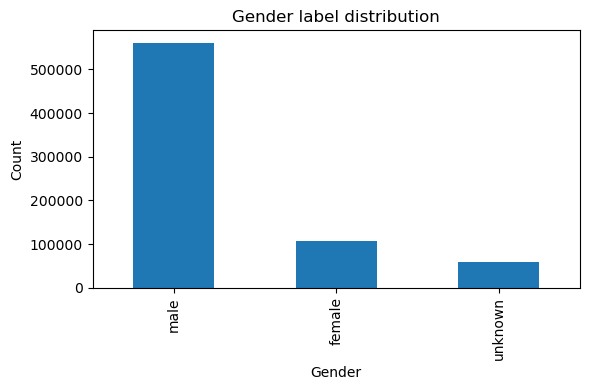

In [8]:
# Bar plot for gender distribution
gender_counts = df["gender"].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind="bar")
plt.title("Gender label distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

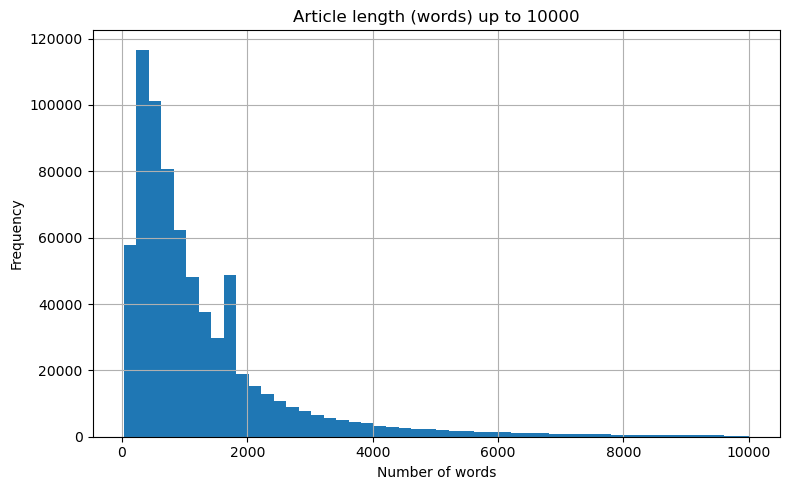

In [9]:
# Histogram of article length in words
plt.figure(figsize=(8, 5))

# Use a simple upper cap to avoid huge tails dominating the plot
max_words = 10000
subset = df[df["article_length_words"] <= max_words]["article_length_words"]

subset.hist(bins=50)
plt.title(f"Article length (words) up to {max_words}")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

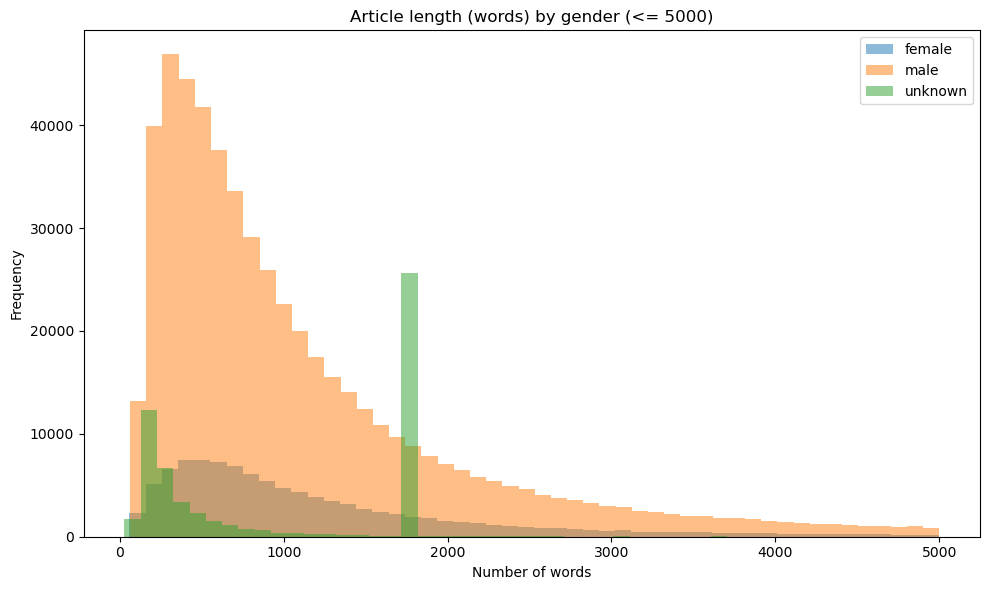

In [12]:
# Histogram by gender (words)
plt.figure(figsize=(10, 6))

max_words = 5000  # same cap
for g in sorted(df["gender"].dropna().unique()):
    sub = df[(df["gender"] == g) & (df["article_length_words"] <= max_words)]
    sub["article_length_words"].plot(kind="hist", bins=50, alpha=0.5, label=g)

plt.title(f"Article length (words) by gender (<= {max_words})")
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 800x500 with 0 Axes>

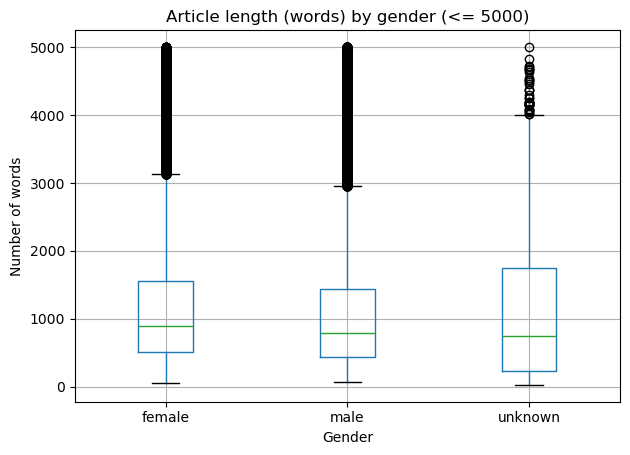

In [11]:
# Boxplot of article length (words) by gender
plt.figure(figsize=(8, 5))

# Optional cap to reduce extreme outliers effect
max_words = 5000
df_box = df[df["article_length_words"] <= max_words].copy()

df_box.boxplot(column="article_length_words", by="gender")
plt.title(f"Article length (words) by gender (<= {max_words})")
plt.suptitle("")  # remove automatic super title
plt.xlabel("Gender")
plt.ylabel("Number of words")
plt.tight_layout()
plt.show()

## Summary

- Gender distribution:
  - We saw the overall counts and proportions of `gender` labels.
- Article length:
  - Average article length (in words) differs across gender groups.
  - Histograms and boxplots show the distribution and outliers.
